Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE 

In [4]:
data = fetch_california_housing()

In [5]:
X = pd.DataFrame(data=data.data, columns=data.feature_names)
y = data.target
y = y.reshape(-1,1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

In [7]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

In [8]:
std = StandardScaler()
X_train_scaled = pd.DataFrame(data = std.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(data = std.transform(X_test), columns=X_test.columns)

In [9]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=4)
X_train_scaled_tsne = tsne.fit_transform(X_train_scaled)

In [10]:
X_train_scaled_tsne

array([[-31.343475,  32.103764],
       [ 18.45858 , -70.38356 ],
       [-67.53232 ,  41.64339 ],
       ...,
       [ 39.36856 , -44.371437],
       [-63.804607,  39.373077],
       [ 28.551435, -84.37588 ]], dtype=float32)

In [11]:
import matplotlib.pyplot as plt

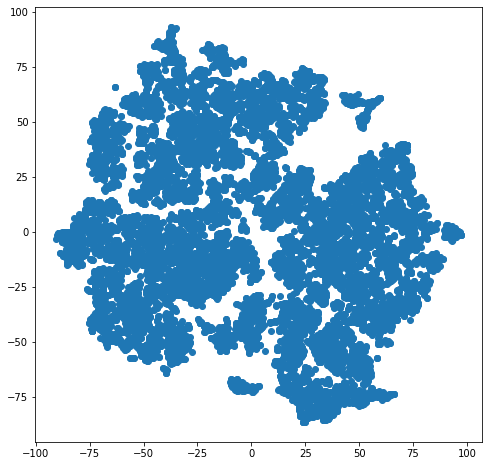

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(x = X_train_scaled_tsne[:,0], y=X_train_scaled_tsne[:,1])

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [13]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, random_state=3)
kmeans.fit(X_train_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=3, random_state=3)

In [31]:
pred_train = kmeans.predict(X_train_scaled)

In [16]:
clusters_train = {i:[] for i in range(3)}
for i,clust in enumerate(pred_train):
  clusters_train[clust].append(X_train_scaled_tsne[i])

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

inertia = []
score = []
gm_bic = []
for i in range(2,20):
  GM = GaussianMixture(n_components=i,max_iter=100,random_state=4).fit(X_train_scaled)
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=3)
  model = kmeans.fit(X_train_scaled)
  inertia.append(model.inertia_)
  score.append(silhouette_score(X_train_scaled,model.labels_,random_state=3))
  gm_bic.append(GM.bic(X_train_scaled))

In [18]:
x = [i for i in range(2,20)]

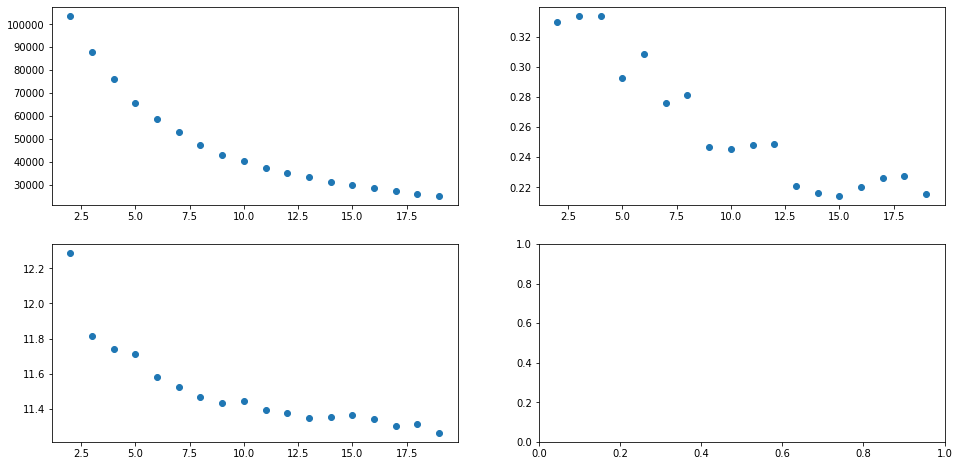

In [19]:
fig = plt.figure(figsize=(16,8))
ax = fig.subplots(2,2)
ax[0,0].scatter(x=x, y=inertia)
ax[0,1].scatter(x=x, y=score)
ax[1,0].scatter(x=x, y=np.log(gm_bic))

Text(0.5, 1.0, 'Training')

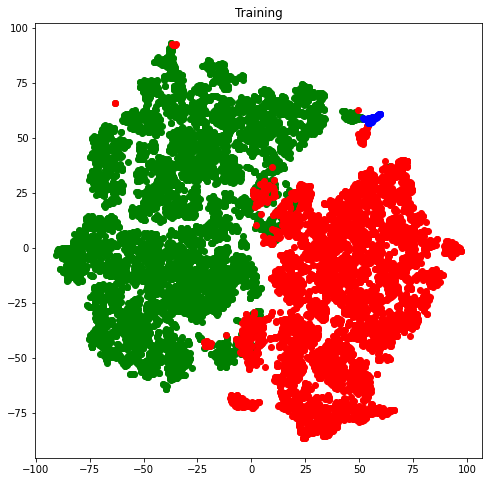

In [20]:
color = ['green','red','blue']
plt.figure(figsize=(8,8))
for i in clusters_train:
  for j in clusters_train[i]:
    plt.scatter(x=j[0],y=j[1],color=color[i])
plt.title('Training')

In [21]:
clusters_all_feature_train = {i:[] for i in range(3)}
for i,clust in enumerate(pred_train):
  clusters_all_feature_train[clust].append(i)

In [22]:
feature_names = data.feature_names
print('Данные на обучении')
for i in clusters_train.keys():
  print(f'Кластер {i}')
  for j in feature_names:
    mean = X_train.iloc[clusters_all_feature_train[i]][j].mean()
    print(f'Среднее значение признака ({j}): {mean}')

Данные на обучении
Кластер 0
Среднее значение признака (MedInc): 3.92391370664438
Среднее значение признака (HouseAge): 28.417049728374426
Среднее значение признака (AveRooms): 5.208570183307867
Среднее значение признака (AveBedrms): 1.072723228638035
Среднее значение признака (Population): 1533.8631424989553
Среднее значение признака (AveOccup): 3.095992909450868
Среднее значение признака (Latitude): 33.94412975344755
Среднее значение признака (Longitude): -118.00867634768073
Кластер 1
Среднее значение признака (MedInc): 3.8097607526881725
Среднее значение признака (HouseAge): 29.009735541993606
Среднее значение признака (AveRooms): 5.502070718043863
Среднее значение признака (AveBedrms): 1.0816052599162653
Среднее значение признака (Population): 1281.9324324324325
Среднее значение признака (AveOccup): 3.0618379351592218
Среднее значение признака (Latitude): 37.95086602731764
Среднее значение признака (Longitude): -121.73061900610286
Кластер 2
Среднее значение признака (MedInc): 3.310

*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [23]:
X_test_scaled_tsne = tsne.fit_transform(X_test_scaled)

In [33]:
pred_test = kmeans.predict(X_test_scaled)

In [36]:
clusters_test = {i:[] for i in range(3)}
for i,clust in enumerate(pred_test):
  clusters_test[clust].append(X_test_scaled_tsne[i])

Text(0.5, 1.0, 'Test')

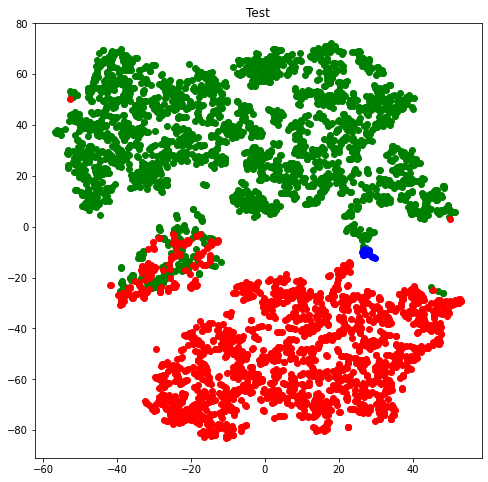

In [37]:
plt.figure(figsize=(8,8))
for i in clusters_test:
  for j in clusters_test[i]:
    plt.scatter(x=j[0],y=j[1],color=color[i])
plt.title('Test')

In [38]:
clusters_all_feature_test = {i:[] for i in range(3)}
for i,clust in enumerate(pred_test):
  clusters_all_feature_test[clust].append(i)

In [39]:
feature_names = data.feature_names
for i in clusters_test.keys():
  print('Данные на обучении')
  print(f'Кластер {i}')
  for j in feature_names:
    mean = X_train.iloc[clusters_all_feature_test[i]][j].mean()
    print(f'Среднее значение признака ({j}): {mean}')

Данные на обучении
Кластер 0
Среднее значение признака (MedInc): 3.8435211749788674
Среднее значение признака (HouseAge): 28.675824175824175
Среднее значение признака (AveRooms): 5.481545626231003
Среднее значение признака (AveBedrms): 1.1110936721948064
Среднее значение признака (Population): 1424.9830938292478
Среднее значение признака (AveOccup): 2.9647219342411946
Среднее значение признака (Latitude): 35.6441504649197
Среднее значение признака (Longitude): -119.56736263736263
Данные на обучении
Кластер 1
Среднее значение признака (MedInc): 3.8473917957544463
Среднее значение признака (HouseAge): 29.179575444635685
Среднее значение признака (AveRooms): 5.408144070097555
Среднее значение признака (AveBedrms): 1.104482538504913
Среднее значение признака (Population): 1351.655765920826
Среднее значение признака (AveOccup): 3.2412022960407225
Среднее значение признака (Latitude): 35.61491681009753
Среднее значение признака (Longitude): -119.5725817555938
Данные на обучении
Кластер 2
Сре

*Задание 4
Обучите любую модель регрессии на этом же датасете. Добавьте новый признак - метка кластера, которую вы уже получили применив модель кластеризации к этим данным. Сравнить качество без метки кластера и с ней по отложенной выборке.


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
X_train_cluster = X_train
X_train_cluster['cluster'] = 0

for i,clust in enumerate(pred_train):
  X_train_cluster['cluster'].iloc[i] = clust

In [ ]:
X_test_cluster = X_test
X_test_cluster['cluster'] = 0

for i,clust in enumerate(pred_test):
  X_test_cluster['cluster'].iloc[i] = clust

In [43]:
param = {'n_estimators':[100,200,300],
         'max_depth':[i for i in range(5,15)],
         'min_samples_leaf':[i for i in range(2,5)]}

**Датасет без кластеризации**

In [44]:
RFR_no_cluster = RandomForestRegressor(n_estimators=300, max_depth=14, min_samples_leaf=2)
RFR_no_cluster.fit(X_train,y_train)

RandomForestRegressor(max_depth=14, min_samples_leaf=2, n_estimators=300)

In [48]:
RFR_no_cluster_pred_train = RFR_no_cluster.predict(X_train)
RFR_no_cluster_pred_test = RFR_no_cluster.predict(X_test)
R2_no_cluster_train = r2_score(RFR_no_cluster_pred_train,y_train)
R2_no_cluster_test = r2_score(RFR_no_cluster_pred_test,y_test)
print(f'Метрика (R2) на обучении: {round(R2_no_cluster_train,4)}\nМетрика (R2) на тесте: {round(R2_no_cluster_test,3)}')

Метрика (R2) на обучении: 0.9246
Метрика (R2) на тесте: 0.744


**Датасет с кластеризацией**

In [ ]:
RFR_cluster = RandomForestRegressor(n_estimators=300, max_depth=14, min_samples_leaf=2)
RFR_cluster.fit(X_train_cluster,y_train)

In [50]:
RFR_cluster_pred_train = RFR_cluster.predict(X_train_cluster)
RFR_cluster_pred_test = RFR_cluster.predict(X_test_cluster)
R2_cluster_train = r2_score(RFR_cluster_pred_train,y_train)
R2_cluster_test = r2_score(RFR_cluster_pred_test,y_test)
print(f'Метрика (R2) на обучении: {round(R2_cluster_train,4)}\nМетрика (R2) на тесте: {round(R2_cluster_test,3)}')

Метрика (R2) на обучении: 0.9241
Метрика (R2) на тесте: 0.742


*Задание 5
Загрузите "wine dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные и тестовые.
Масштабируйте данные.
Постройте модель понижения размерности на тренировочный данных, визуализируйте с помощью диаграммы рассеяния, подберите оптимальные гиперпараметры, чтобы сегментов на графике было столько, сколько классов в данных.
С помощью модели кластеризации (поэкспериментируйте и с другими моделями, не только с KMeans) разбейте данные из тренировочного набора на необходимое количество кластеров.
Постройте диаграмму рассеяния на данных, полученных с помощью понижения размерности и раскрасьте точки из разных кластеров разными цветами.
Убедитесь с помощью визуализации, что разбиение данных из тестового набора получилось успешным.
Сделайте вывод, какие модели лучше себя показывают на этой задаче.


In [51]:
from sklearn.datasets import load_wine
from sklearn.model_selection import GridSearchCV

In [52]:
data = load_wine()

In [53]:
X = pd.DataFrame(data=data.data, columns=data.feature_names)
y = data.target
y = y.reshape(-1,1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [55]:
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

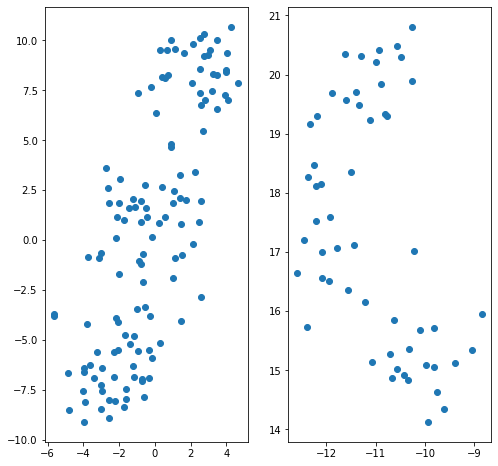

In [56]:
tsne = TSNE(n_components=2,learning_rate=100, min_grad_norm=10**-4, n_iter=1500, random_state=3)
X_train_scaled_tsne = tsne.fit_transform(X_train_scaled)
X_test_scaled_tsne = tsne.fit_transform(X_test_scaled)

fig = plt.figure(figsize=(8,8))
ax = fig.subplots(1,2)
ax[0].scatter(x = X_train_scaled_tsne[:,0], y=X_train_scaled_tsne[:,1])
ax[1].scatter(x = X_test_scaled_tsne[:,0], y=X_test_scaled_tsne[:,1])

**KMeans**

In [57]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, random_state=3).fit(X_train_scaled)

pred_train_kmeans = kmeans.predict(X_train_scaled)

pred_test_kmeans = kmeans.predict(X_test_scaled)

clusters_train_kmeans = {i:[] for i in range(3)}
for i,clust in enumerate(pred_train_kmeans):
  clusters_train_kmeans[clust].append(X_train_scaled_tsne[i])

clusters_test_kmeans = {i:[] for i in range(3)}
for i,clust in enumerate(pred_test_kmeans):
  clusters_test_kmeans[clust].append(X_test_scaled_tsne[i])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Train')

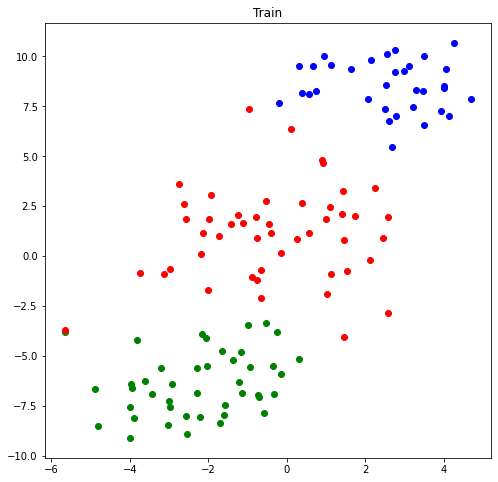

In [58]:
plt.figure(figsize=(8,8))
for i in clusters_train_kmeans:
  for j in clusters_train_kmeans[i]:
    plt.scatter(x=j[0],y=j[1],color=color[i])
plt.title('Train')

Text(0.5, 1.0, 'Test')

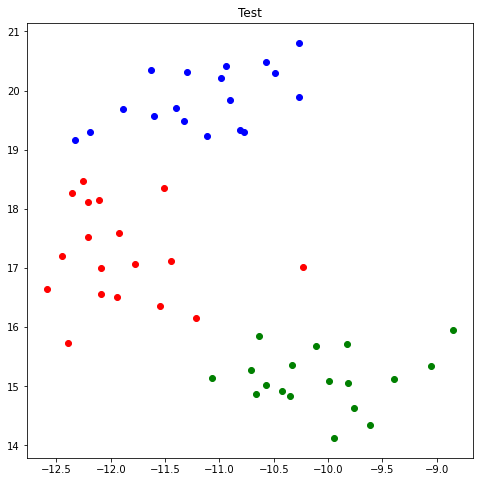

In [59]:
plt.figure(figsize=(8,8))
for i in clusters_test_kmeans:
  for j in clusters_test_kmeans[i]:
    plt.scatter(x=j[0],y=j[1],color=color[i])
plt.title('Test')

**GaussianMixture**

In [60]:
gm = GaussianMixture(n_components=3,init_params='k-means++',random_state=4).fit(X_train_scaled)

pred_train_gm = gm.predict(X_train_scaled)

pred_test_gm = gm.predict(X_test_scaled)

clusters_train_gm = {i:[] for i in range(3)}
for i,clust in enumerate(pred_train_gm):
  clusters_train_gm[clust].append(X_train_scaled_tsne[i])

clusters_test_gm = {i:[] for i in range(3)}
for i,clust in enumerate(pred_test_gm):
  clusters_test_gm[clust].append(X_test_scaled_tsne[i])

Text(0.5, 1.0, 'Training')

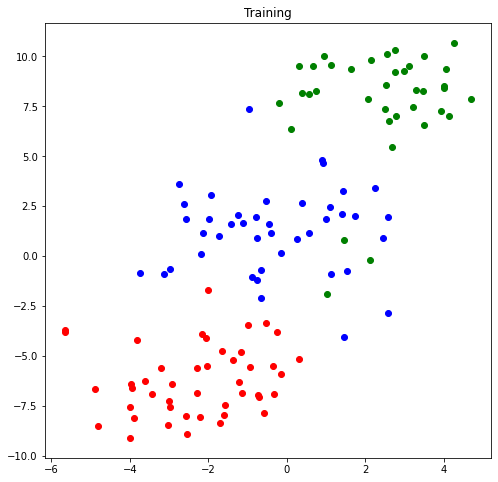

In [61]:
plt.figure(figsize=(8,8))
for i in clusters_train_gm:
  for j in clusters_train_gm[i]:
    plt.scatter(x=j[0],y=j[1],color=color[i])
plt.title('Training')

Text(0.5, 1.0, 'Test')

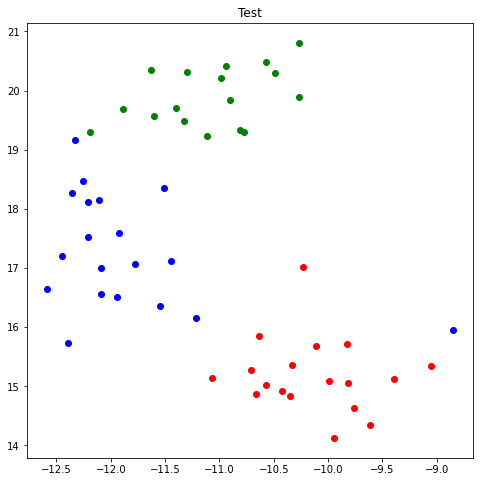

In [62]:
plt.figure(figsize=(8,8))
for i in clusters_test_gm:
  for j in clusters_test_gm[i]:
    plt.scatter(x=j[0],y=j[1],color=color[i])
plt.title('Test')

**SpectralClustering**

In [63]:
from sklearn.cluster import SpectralClustering

In [64]:
sc = SpectralClustering(n_clusters=3,random_state=4,n_init=15,affinity='nearest_neighbors').fit(X_train_scaled)

pred_train_sc = sc.fit_predict(X_train_scaled)

clusters_train_sc = {i:[] for i in range(3)}
for i,clust in enumerate(pred_train_sc):
  clusters_train_sc[clust].append(X_train_scaled_tsne[i])

Text(0.5, 1.0, 'Training')

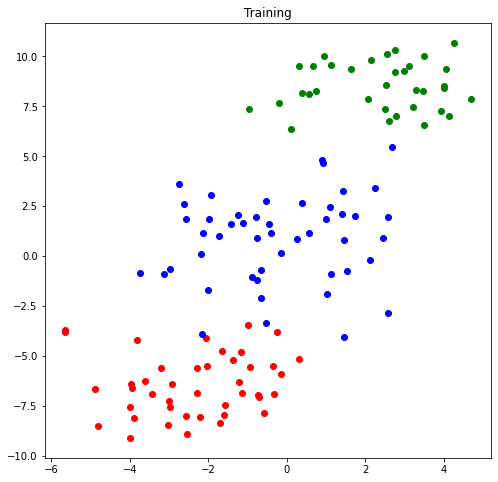

In [65]:
plt.figure(figsize=(8,8))
for i in clusters_train_sc:
  for j in clusters_train_sc[i]:
    plt.scatter(x=j[0],y=j[1],color=color[i])
plt.title('Training')

*Задание 6
Используйте "Olivetti faces data-set from AT&T" из встроенных наборов данных библиотеки sklearn.
Обучить любую модель классификации на этом датасете до применения PCA (количество компонент подберите самостоятельно) и после него. Сравнить качество классификации по отложенной выборке.


In [66]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
olivetti = fetch_olivetti_faces()
X = olivetti.data
y = olivetti.target

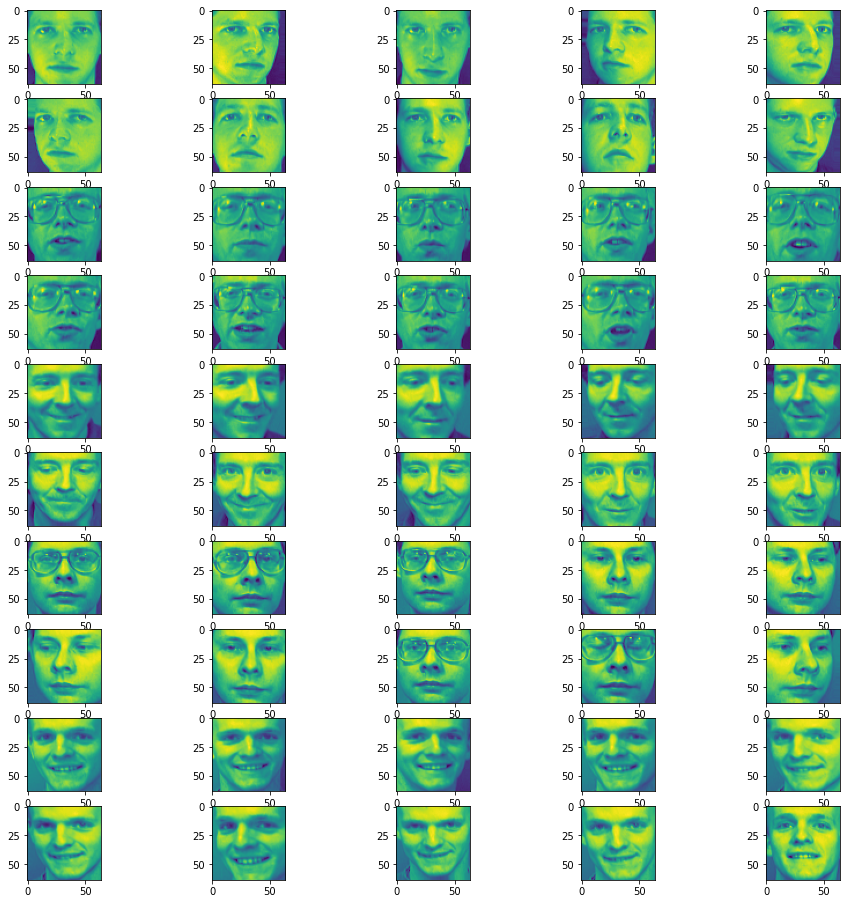

In [68]:
plt.figure(figsize=(16,16))
for i in range(50):
    plt.subplot(10, 5, i + 1)
    plt.imshow(X[i, :].reshape([64, 64]))

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [70]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
pca = PCA(n_components=80,random_state=4,whiten=True, svd_solver='full')

X_train_scaled_pca = pca.fit_transform(X_train_scaled)

X_test_scaled_pca = pca.fit_transform(X_test_scaled)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [73]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance').fit(X_train_scaled, y_train)

pred_train_scaled_no_pca = knn.predict(X_train_scaled)

pred_test_scaled_no_pca = knn.predict(X_test_scaled)

**До PCA**

Метрики на обучении

In [74]:
print(classification_report(pred_train_scaled_no_pca,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00         9
          16       1.00      1.00      1.00         7
          17       1.00    

Метрики на тесте

In [75]:
print(classification_report(pred_test_scaled_no_pca,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         4
          14       1.00      0.20      0.33         5
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         2
          18       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**После PCA**

In [118]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance').fit(X_train_scaled_pca, y_train)

pred_train_scaled_pca = knn.predict(X_train_scaled_pca)

pred_test_scaled_pca = knn.predict(X_test_scaled_pca)

Метрики на обучении

In [119]:
print(classification_report(pred_train_scaled_pca,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00         9
          16       1.00      1.00      1.00         7
          17       1.00    

Метрики на тесте

In [120]:
print(classification_report(pred_test_scaled_pca,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       1.00      0.11      0.20         9
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         3
          18       0.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

Можно сделать вывод, что понижение размерности не дает практических результатов. Без применении PCA видим что данные являются практически максимально синтетическими(метрики на обучении равняются 1, а на тесте 0,9)